# Obesity-Prediction-Data-Science
Data Science project for Sem-5

Prediction of levels of obesity by using machine learning classification models.

Data collected from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+). Official publication of the research that provides data can be accessed from [here](https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub).

## Data Set Information:

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.


### Imports

In [89]:
#import packages
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [13]:
#read data
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [45]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,result
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


##### Attributes consisting of

* What is your gender? (Gender) = Female, Male  
* What is your age? (Age) = Numeric value  
* What is your height? (Height) = Numeric value in meters  
* What is your weight? (Weight) = Numeric value in Kilograms  
* Has a family member suffered or suffers from overweight? = Yes, No  
* Do you eat high caloric food frequenlty? (FAVC) = Yes, No  
* Do you usually eat vegatables in your meals? (FCVC) = 1-3 follow by usually meal  
* How many main meals do you have daily? (NCP) = Between 1 y 2, 3, more than 4  
* Do you eat any food between mean? (CAEC) = No, Sometimes, Frequently, Always  
* Do you smoke? (Smoke) = Yes, No  
* How much water do you drink daily? (CH20) = less than a liter, between 1 and 2L, more than 2 L  
* Do you monitor the calories you eat daily? (SCC) = Yes, No  
* How often do you have physical activity? (FAF) = I do not have, 1 or 2 days, 2 or 4 days, 4 or 5 day  
* How much time do you use technological devices? (TUE) = 0-2 hours, 3-5 hours, more than 5 hours  
* How often do you drink alcohol? (CALC) =I don't drink, Sometimes, Frequently, Always  
* Which transportation do you usually use? (MTRANS) = Automobile, Motorbike, Bike Public Transportation, Walking  


### Data Preprocessing

In [49]:
df = df.rename(columns={'NObeyesdad': 'result'})

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
df.shape

(2111, 17)

In [35]:
df.isnull().sum()
# no data cleaning required

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
result                            0
dtype: int64

* The data contains 2111 records with 17 columns
* The data loads as text and float objects for most of the objects. However we know that some are float, categorical and ordinal
* All of the records are unique and contain no null values
* Height and Weight are included however they have a direct correlation to each other and our target variable

### Exploratory Data Analysis

In [54]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.
    
    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = sns.cubehelix_palette(), order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()

In [60]:
def plot_distribution(dataset, feature):
    """
    Function: Computes and displays distribution of features with continuous values; plots their mean and median.
    
    Parameters: Dataset and feature with continuous values.
    """
    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "orange", label = "median")
    
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

In [158]:
def cross_plot(dataset, lead_category, sup_category, order = None, hue_order= None):
    """
    Function: Plots interaction between two categorical variables.
    
    Parameters: Dataset, lead category, suplemental category, and order of appearance (order is optional).
    """
    
    ax = sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette="Blues_r", hue_order= hue_order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {lead_category} with respect to {sup_category}")
    
    plt.show()

In [150]:
def cmp_plot(dataset, lead_category, sup_category, order = None):
    """
    Function: Plots interaction between two categorical variables.
    
    Parameters: Dataset, lead category, suplemental category, and order of appearance (order is optional).
    """
    
    ax = sns.histplot(data= dataset, x=sup_category, hue=lead_category, palette= "rocket", hue_order= order)
    
    plt.show()

#### Obesity Levels

In [64]:
weight_order=  ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]

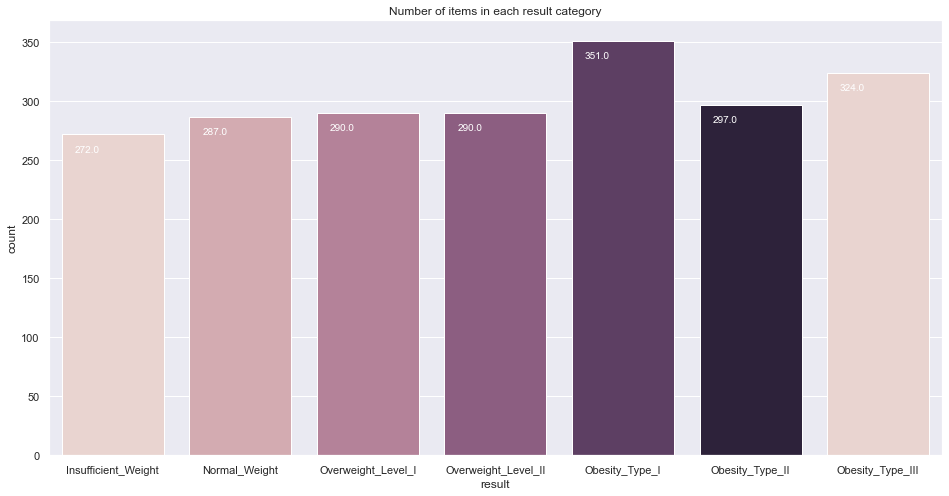

In [65]:
count_values(df, "result", weight_order) 

* 351 instances are belong to "obesity_type_1"; more than 250 instances are belong to "insufficient_weight" class.

* The plot shows the dataset is balanced; only "Obese Type I" class slightly outnumber the other categories.

#### Gender

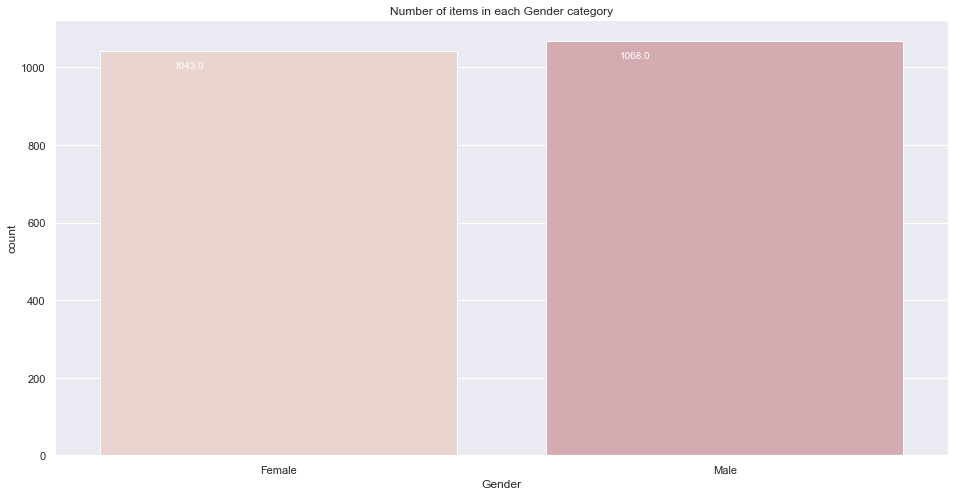

In [59]:
count_values(df, "Gender")

There are almost an equal number of females and males in the dataset. Data is available for slightly more men than women but this does not make it imbalanced.

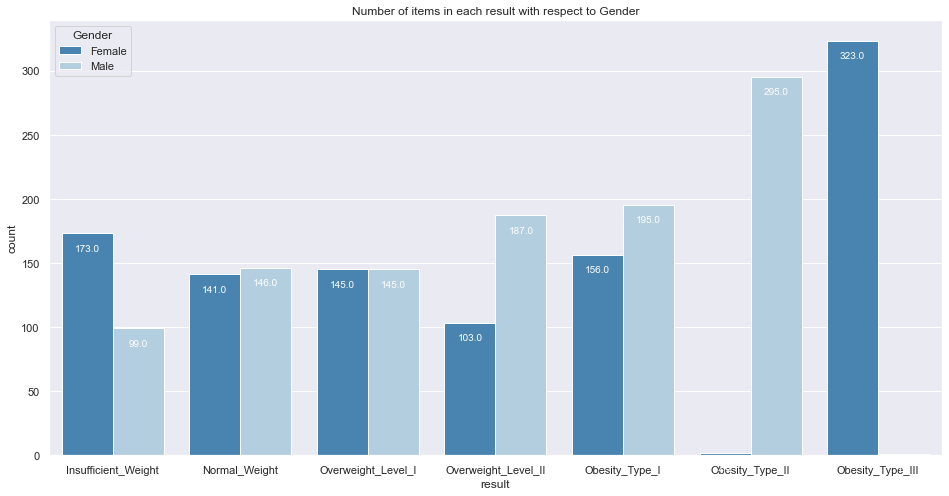

In [139]:
cross_plot(df, "result", "Gender", weight_order)

* Women are more likely to have "Insufficient weight" than men. On the other hand, there are more obese men than women, save in the last, extreme obesity category.
* Females do not have "obesity_type_2". males do not have "obesity_type_3"

#### Age

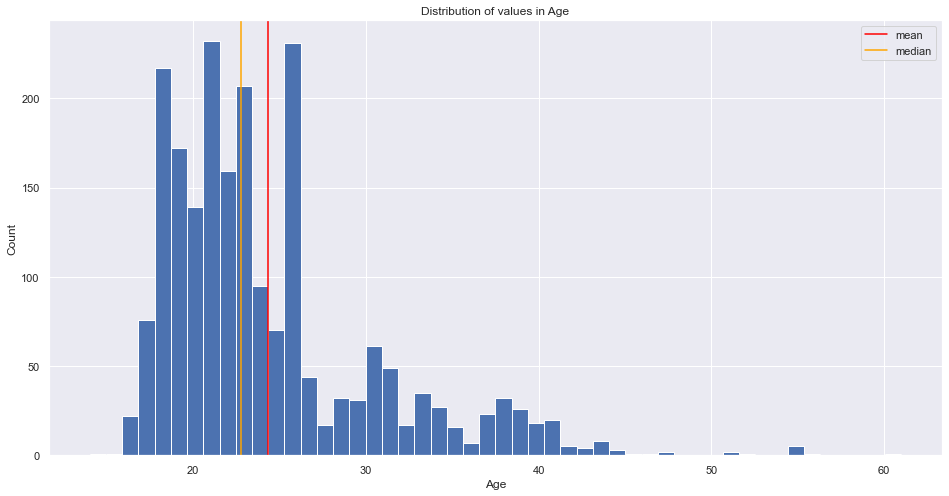

In [77]:
plot_distribution(df, "Age")

In [78]:
df["Age"].describe()

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

* We can see that mostly young people were joined the survey.

* Top 3 ages: 21, 18, 19

#### Height & Weight

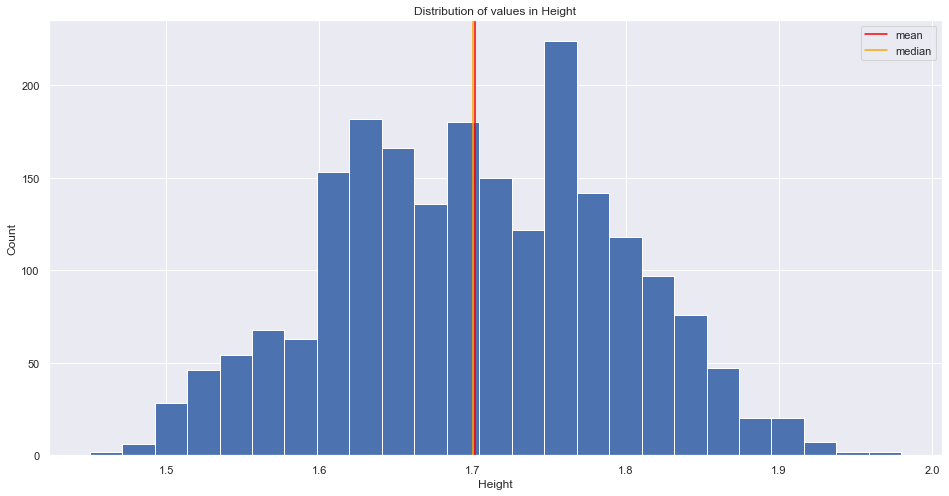

In [82]:
plot_distribution(df, "Height")

* Most people are 1.60 m - 1.85 m tall. Both mean and median values are around 1.70.

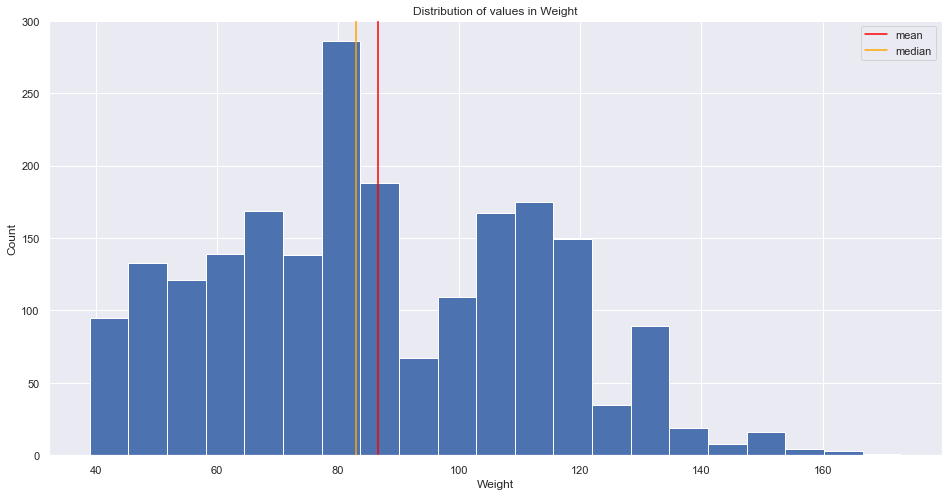

In [87]:
plot_distribution(df, "Weight")

* The mean and the median are shifted to the left because of the larger number of people weighting 80 kg.

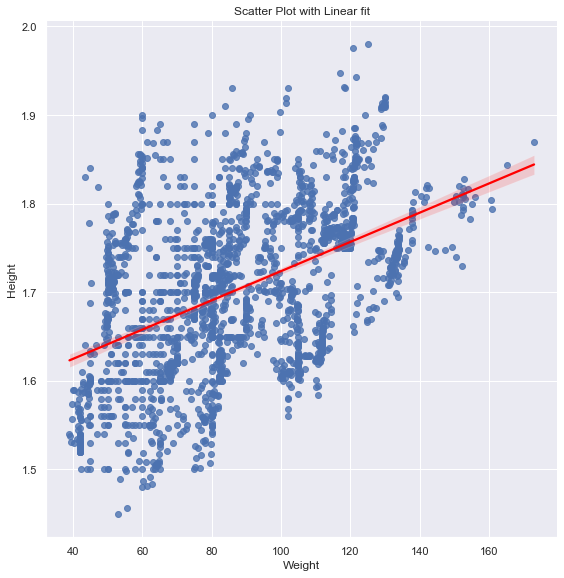

In [97]:
# Obesity is calculated by BMI
# Body Mass Index (BMI) = Weight/(Height)^2
# Correlation Between Height & Weight


sns.lmplot(x='Weight', y='Height', data=df, height= 8, line_kws={'color': 'red'})
plt.title("Scatter Plot with Linear fit");


The red line shows that there is a positive correlation between them, which means an increase in one variable leads to an increase in the other. In other words, taller people are more likely to weight more.

#### Family History

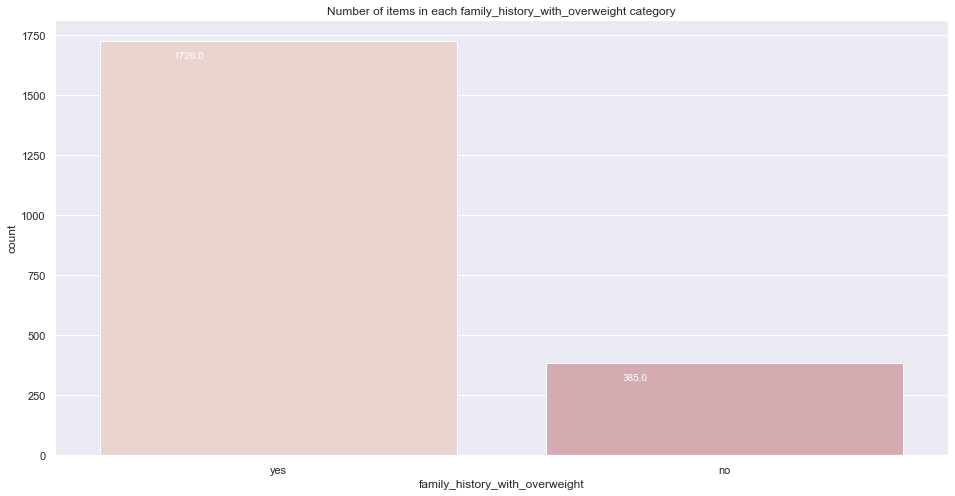

In [103]:
count_values(df, "family_history_with_overweight")

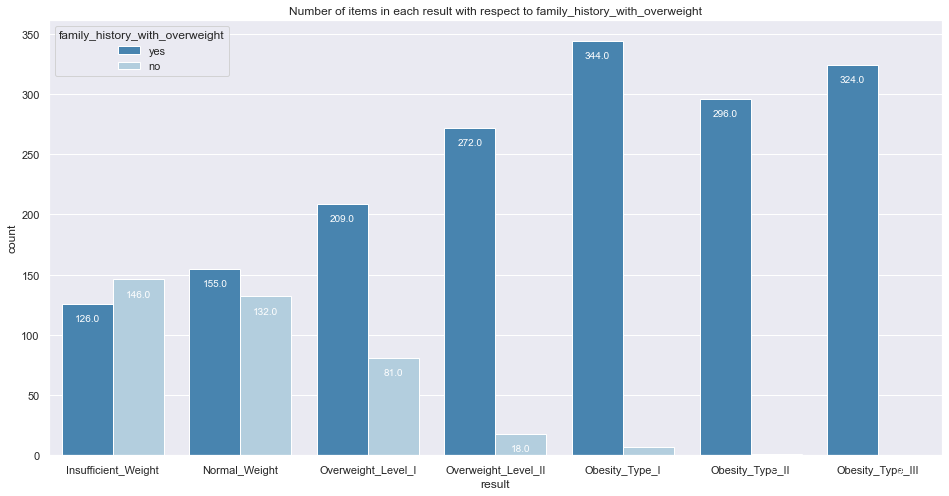

In [109]:
cross_plot(df, "result", "family_history_with_overweight", weight_order)

All those categorised as overweight or obese had family members suffering from weight problems.

#### High caloric food Consumption

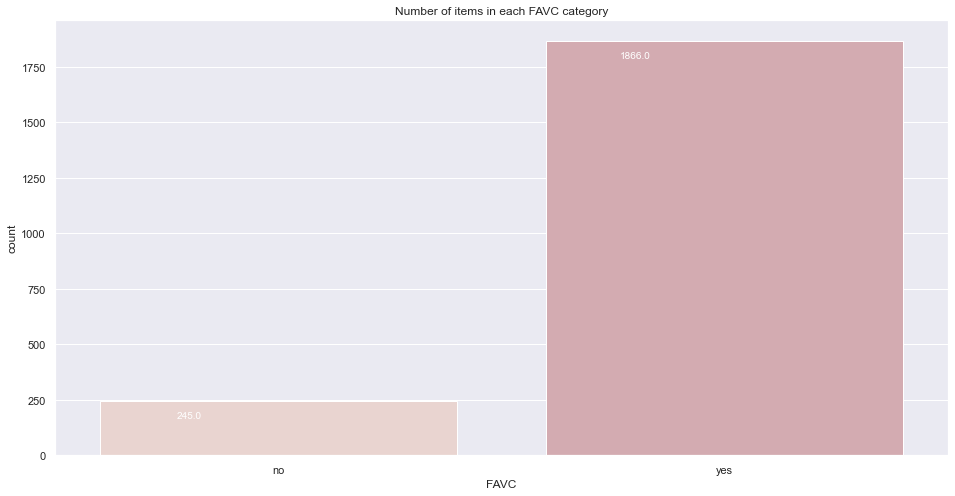

In [110]:
count_values(df, "FAVC")

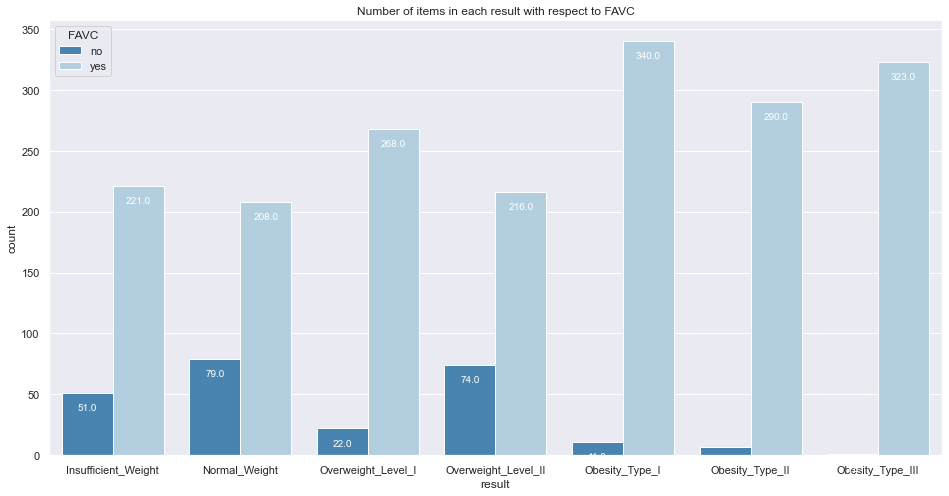

In [131]:
cross_plot(df, "result", "FAVC", weight_order)

#### Consumption of Vegetables

"FCVC" column denotes if people consume vegetables.  
It could be assumed that "3" means "Always", "2" - "Sometimes", and "1" - "Never", but it is not clear what the values inbetween mean.

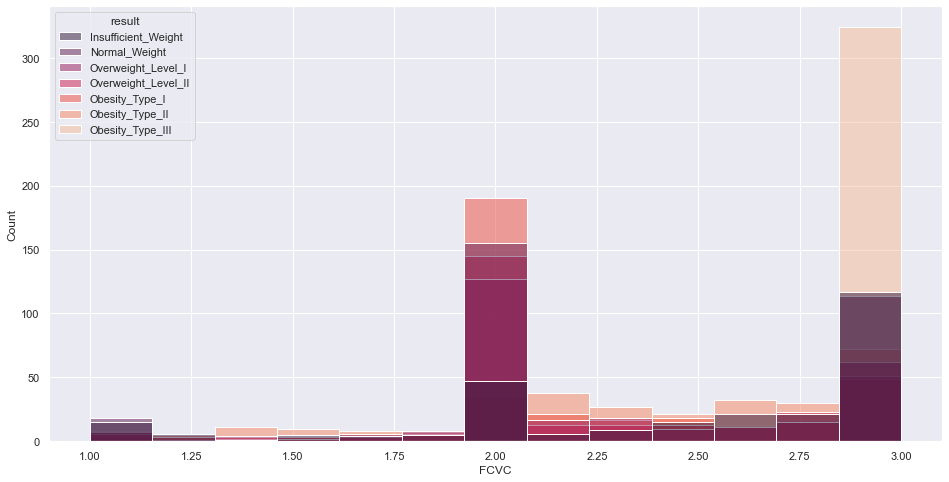

In [154]:
cmp_plot(df, "result", "FCVC", weight_order)

#### Meals per day

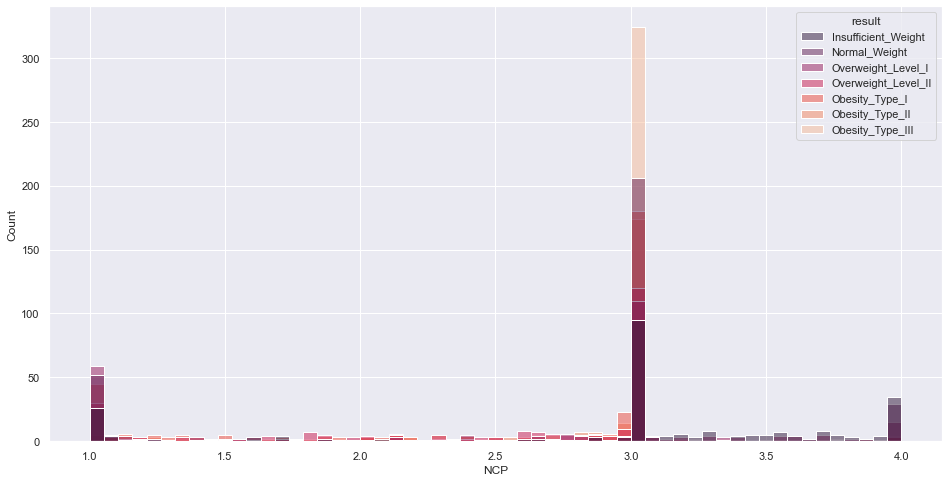

In [155]:
cmp_plot(df, "result", "NCP", weight_order)

#### Food between meals

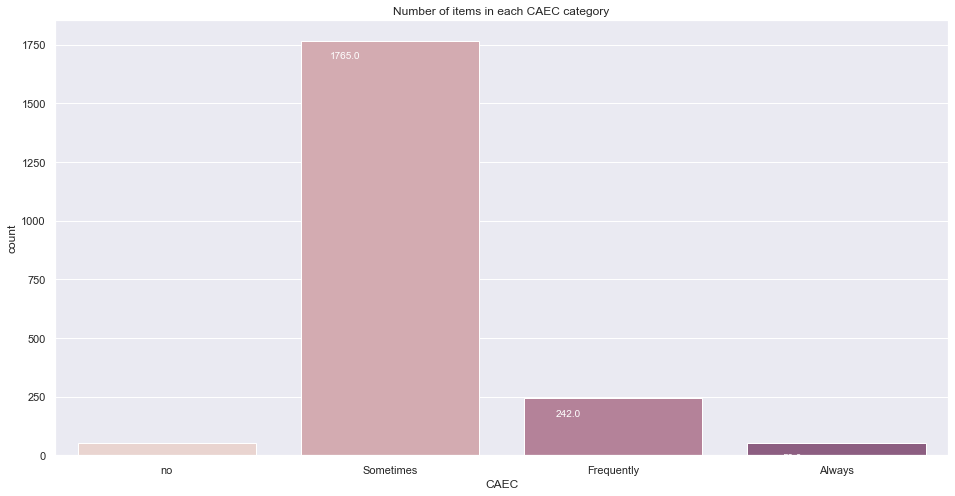

In [147]:
count_values(df, "CAEC", ["no", "Sometimes", "Frequently", "Always"])

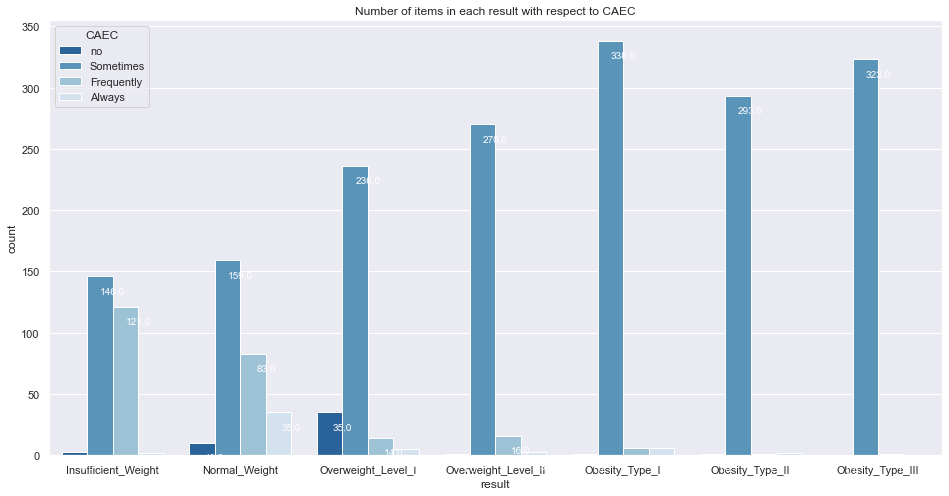

In [160]:
cross_plot(df, "result", "CAEC", weight_order, hue_order= ["no", "Sometimes", "Frequently", "Always"])